In [23]:
from datapool_client import DataPool
import sys
sys.path.append(r'C:\Users\steineph\DataAnalysis\UWO-Dataanalysis\libs')
from UWO_DataAnalysis import helper_functions
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np


%load_ext autoreload
%autoreload 2

In [24]:
dp=DataPool()

You are successfully connected to the database!


In [3]:
dp.parameter.all()

,parameter_id,name,unit,description
0,20,rainfall_intensity,mm/h,Main measurement parameter: The rainfall inten...
1,1,rssi,dBm,Signal transmission information: Received sign...
2,5,device_temperature,-,Internal parameter: The parameter refers to th...
3,11,snr,dB,Measurement quality information & Signal trans...
4,29,turbidity,NTU,Main measurement parameter: Turbidity measurem...
5,17,battery_charge,%,Internal parameter: This parameter is an inter...
6,16,dielectric_permittivity,-,Main measurement parameter: The dielectic perm...
7,31,nos,-,Measurement quality information: The parameter...
8,30,eui,-,Internal parameter: The extended unique identi...
9,12,trials,-,Measurement quality information: Trials(range:...


In [4]:
source_types=[]
for source in  dp.source.all()['name'].unique():
    if source[:2] not in source_types:
        source_types.append(source[:2])
source_types

['bt', 'bl', 'bf', 'bm', 'bn', 'bx', 'bp', 'bq']

In [25]:
sources=dp.source.all()
#sources[sources['name'].str.startswith('bf')]

In [28]:
class Fruit(object):
    def __init__(self, concept):
        self.concept = concept

a = Fruit('test')

In [29]:
a.concept

'test'

In [6]:
dp.site.all()

,site_id,name,description,street,postcode,city,country,coord_x,coord_y,coord_z
0,60,527_mandliwisstrasse,stormwater manhole that also contains water fr...,Mandliwisstrasse,8320,Fehraltorf,Switzerland,8.757514,47.393429,543.6
1,74,3r_rub_morg_overflow,Overflow chanel from Rub Morgenthal to the cre...,Fehraltorferstrasse,8332,Russikon,Switzerland,8.769530,47.391370,573.3
2,24,vs22_kempttalstr,This site is a diversion point where the waste...,Kempttalstrasse,8320,Fehraltdorf,Switzerland,8.753752,47.386987,534.0
3,33,58sbw_undermulistr,Measurment site in front of the gate valves. O...,Undermuelistrasse,8320,Fehraltdorf,Switzerland,8.743362,47.389434,521.0
4,13,597sbw_ara,The site is a few meters away from the WWTP an...,Undermuelistrasse,8320,Fehraltdorf,Switzerland,8.740529,47.391157,522.0
...,...,...,...,...,...,...,...,...,...,...
63,66,162_luppmenweg,manhole between rub128 and manhole 164. It is ...,Luppmenweg,'8320',Fehraltorf,Switzerland,8.748025,47.387228,527.0
64,51,607sbw_kempttalerstr,measuring the level of the sewer coming down f...,Kempttalstrasse,8320,Fehraltorf,Switzerland,8.758279,47.383788,536.5
65,55,806_industry,Measurement station for discharge.,Undermuelistrasse,8320,Fehraltorf,Switzerland,8.733871,47.394897,516.4
66,35,7_kempttalstr,The sensor is measuring the level in the sewer...,Kempttalstrasse,8320,Fehraltdorf,Switzerland,8.756941,47.384710,536.0


In [7]:
source_name = "bf_f07_23_bahnhofstr"
#site = "your_site_name"
ret_df = dp.signal.get(source_name=source_name, start='2021-08-01')

In [8]:
ret_df.parameter.unique()


array(['battery_voltage', 'csq', 'water_level',
       'opposite_direction_ratio', 'flow_rate', 'bandwidthclass', 'gain',
       'snr', 'surface_velocity'], dtype=object)

In [9]:
data_q=helper_functions.filter_db_for_boxplot(sensor_group='bf', start='2021-08-01', parameter_unit='l/s', keyword='' ).set_index('timestamp')
data_h=helper_functions.filter_db_for_boxplot(sensor_group='bf', start='2021-08-01', parameter_unit=('mm'), keyword='' ).set_index('timestamp')
data_h=data_h[data_h['parameter_name']=='water_level']

joined_df=new_df = pd.merge(data_q, data_h,  how='inner', on=['timestamp','source_name'], suffixes=('_q', '_h'))
joined_df.index=pd.to_datetime(joined_df.index)

You are successfully connected to the database!


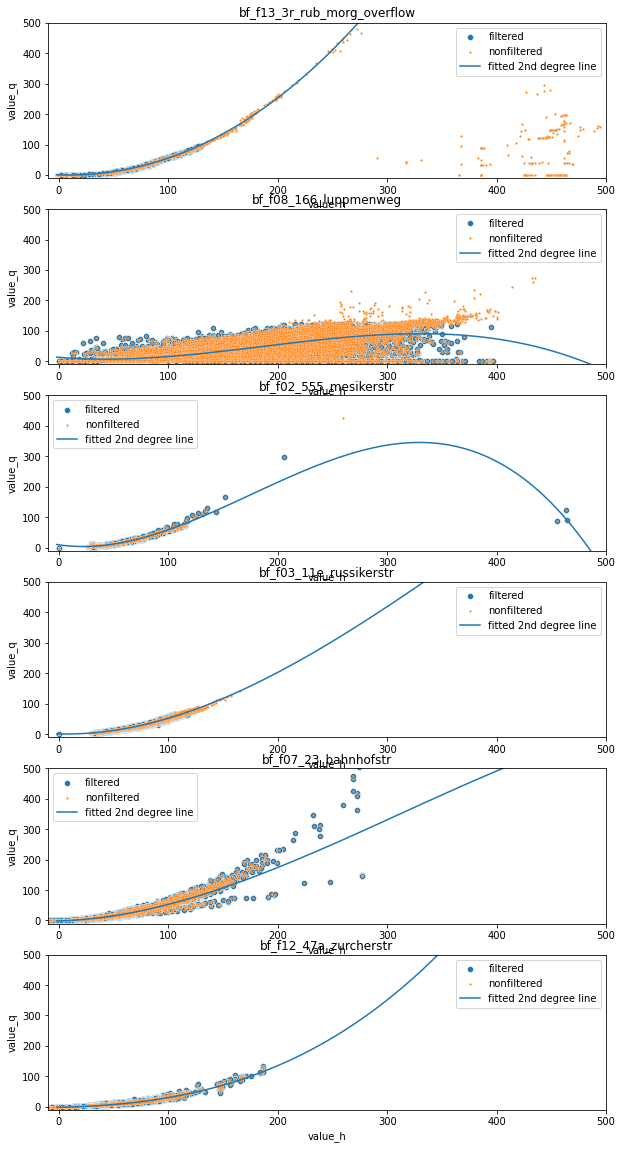

In [80]:
fig, ax = plt.subplots(figsize=(10, 20),ncols=1, nrows=len(list(joined_df['source_name'].unique())))
for i, source in enumerate(list(joined_df['source_name'].unique())):
    data_minimal=joined_df[joined_df['source_name']==source][['value_q', 'value_h']]
    data_minimal_filtered = data_minimal[(np.abs(stats.zscore(data_minimal)) < 3).all(axis=1)]
    sns.scatterplot(data=data_minimal_filtered, x='value_h', y='value_q', ax=ax[i], label='filtered')
    sns.scatterplot(data=data_minimal, x='value_h', y='value_q', ax=ax[i], label='nonfiltered', s=5)
    trend = np.polyfit(np.array(data_minimal_filtered['value_h']),np.array(data_minimal_filtered['value_q']),3)
    trendpoly = np.poly1d(trend) 
    xp = np.linspace(-2, 500, 100)
    plot_fit = sns.lineplot(x=xp,y=trendpoly(xp), ax=ax[i], label = 'fitted 2nd degree line')
    ax[i].set_xlim(left=-10, right=500)
    ax[i].set_ylim(bottom=-10, top=500)
    ax[i].set_title(source)
        

In [ ]:

# Import pandas library
import pandas as pd
  
# initialize list of lists
data = [[4.0,  0.89],[4,  0.56], [6,  0.7], [6,  0.23], [78.0, 0.8], [78.0 , 0.45], [ 81.0, 0.90], [81.0 0.23]]
  
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Name', 'Age'])

In [4]:
import json
with open(r"C:\Users\steineph\DataAnalysis\UWO-Dataanalysis\qh_curve_params.json", "r") as outfile:
    data=json.load(outfile)
data['bf_f13_3r_rub_morg_overflow']['Curve parameter']


[-5.269927580849459e-06,
 0.00860911463343407,
 -0.2536460469730026,
 0.9502849330475637]

In [14]:
data

{'bf_f13_3r_rub_morg_overflow': {'source_name': 'bf_f13_3r_rub_morg_overflow',
  'Curve parameter': [-5.269927580849459e-06,
   0.00860911463343407,
   -0.2536460469730026,
   0.9502849330475637],
  'Q(height)': '-5.269927580849459e-06h3+0.00860911463343407x2+-0.2536460469730026x+-5.269927580849459e-06'},
 'bf_f07_23_bahnhofstr': {'source_name': 'bf_f07_23_bahnhofstr',
  'Curve parameter': [3.465201582192611e-06,
   0.004265450861090924,
   0.08401363640515025,
   -1.087261968238996],
  'Q(height)': '3.465201582192611e-06h3+0.004265450861090924x2+0.08401363640515025x+3.465201582192611e-06'}}

In [21]:
import numpy as np
trendpoly = np.poly1d(data['bf_f13_3r_rub_morg_overflow']['Curve parameter'])
trendpoly([100, 200])

array([ 56.40689899, 252.42624023])

In [20]:
trendpoly(200)

214.05511241396889